In [1]:
# Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# Reading Dataset 

book = pd.read_csv("books.csv",sep=";",error_bad_lines=False, encoding="latin-1")
rating =pd.read_csv("ratings.csv",sep=";",error_bad_lines=False, encoding="latin-1")

C:\Users\PRITAM VERMA\AppData\Local\Temp\ipykernel_9860\3195329090.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book = pd.read_csv("books.csv",sep=";",error_bad_lines=False, encoding="latin-1")
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957:

In [3]:
book = pd.DataFrame(book)

In [4]:
rating = pd.DataFrame(rating)

In [5]:
df = book.merge(rating,on="ISBN")

In [6]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [7]:
new_df = df[['ISBN','Book-Title','Book-Author','User-ID','Book-Rating']]

In [8]:
new_df

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,41385,0
...,...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,Paula Danziger,276463,7
1031132,0525447644,From One to One Hundred,Teri Sloat,276579,4
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,276680,0
1031134,0192126040,Republic (World's Classics),Plato,276680,0


In [20]:
# This Shows how may users have read the perticualr Book.
# bmt175 - book readed by more than 175 users 

popular_books = new_df.groupby("Book-Title").count()["User-ID"]>175
bmt175 = popular_books[popular_books].index


<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

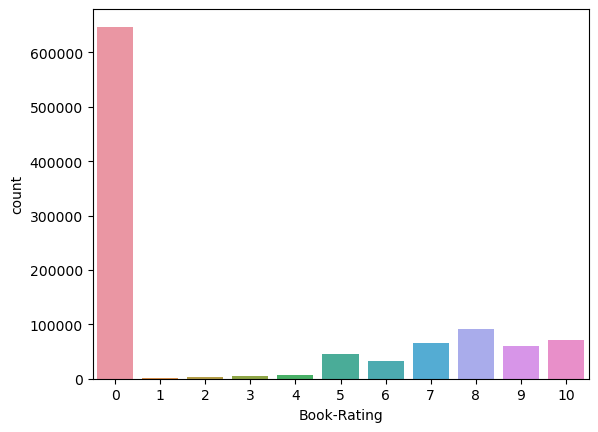

In [10]:
sns.countplot(x="Book-Rating",data=new_df)

In [11]:
# Removing any null values

new_df = new_df.dropna()

In [12]:
# NO. of Ratings given by a single user.

x = new_df.groupby("User-ID").count()["Book-Rating"]>250
rating_giving_user = x[x].index


In [21]:
new_df = new_df[new_df["User-ID"].isin(rating_giving_user)]

In [24]:
new_df = new_df[new_df["Book-Title"].isin(bmt175)]
new_df

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,11676,9
33,0399135782,The Kitchen God's Wife,Amy Tan,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,113270,0
39,0399135782,The Kitchen God's Wife,Amy Tan,113519,0
...,...,...,...,...,...
1026480,0739420712,Skipping Christmas,John Grisham,234623,0
1027889,0060093102,Mystic River,Dennis Lehane,238120,0
1028600,0394429869,I Know Why the Caged Bird Sings,Maya Angelou,239594,8
1028815,0743527631,The Pillars of the Earth,Ken Follett,240144,0


In [25]:
new_df.drop_duplicates()

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,11676,9
33,0399135782,The Kitchen God's Wife,Amy Tan,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,113270,0
39,0399135782,The Kitchen God's Wife,Amy Tan,113519,0
...,...,...,...,...,...
1026480,0739420712,Skipping Christmas,John Grisham,234623,0
1027889,0060093102,Mystic River,Dennis Lehane,238120,0
1028600,0394429869,I Know Why the Caged Bird Sings,Maya Angelou,239594,8
1028815,0743527631,The Pillars of the Earth,Ken Follett,240144,0


In [31]:
bookmat = new_df.pivot_table(index="Book-Title",columns="User-ID",values="Book-Rating")

In [32]:
bookmat

User-ID,254,2276,2766,3363,4385,6251,6543,6575,7158,7346,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Case of Need,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,7.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wish You Well,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Without Remorse,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wuthering Heights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [39]:
bookmat.fillna(0,inplace=True)
bookmat

User-ID,254,2276,2766,3363,4385,6251,6543,6575,7158,7346,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Case of Need,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wish You Well,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Without Remorse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
sim_book = cosine_similarity(bookmat)

In [42]:
np.where(bookmat.index=='Wish You Well')[0][0]

373

In [59]:
t = sorted(list(enumerate(sim_book[0])),key = lambda x:x[1],reverse=True)[1:6]

In [73]:
for i in t:
    print(bookmat.index[i[0]])
    

The Handmaid's Tale
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel
Brave New World
The Bonesetter's Daughter


In [72]:
bookmat.index[279]

"The Handmaid's Tale"

In [76]:
def recomended_book(book):
    book_index = np.where(bookmat.index==book)[0][0]
    top_5 = sorted(list(enumerate(sim_book[book_index])),key = lambda x:x[1],reverse=True)[1:6]
    for i in top_5:
        print(bookmat.index[i[0]])
    

In [80]:
recomended_book("Zen and the Art of Motorcycle Maintenance: An Inquiry into Values")

Prodigal Summer
Pet Sematary
The Hitchhiker's Guide to the Galaxy
A Prayer for Owen Meany
Beloved
